In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
#https://towardsdatascience.com/an-introduction-to-logistic-regression-8136ad65da2e
#https://www.baeldung.com/cs/gradient-descent-logistic-regression

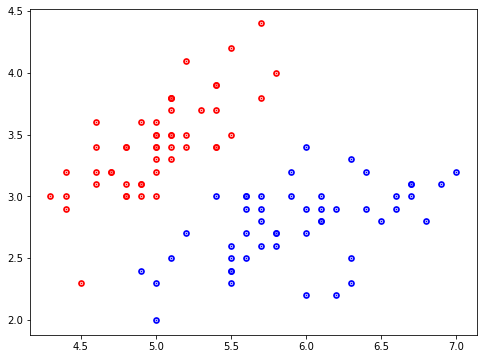

In [26]:
# Load data
iris = datasets.load_iris()
X=iris.data[0:99,:2]
y=iris.target[0:99]
# Plot the training points
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(3, figsize=(8, 6))
plt.scatter(X[y==0][:,0], X[y==0][:,1], s=3, c='r',linewidth=5)
plt.scatter(X[y==1][:,0], X[y==1][:,1], s=3, c='b',linewidth=5)

plt.show()

In [3]:
#Step 1: Initial Model Parameter
Learning_Rate=0.1
num_iterations=1000
N=len(X)
w=np.zeros((2,1))
b=0
costs=[]
for i in range(num_iterations):
  #Step 2: Apply sigmoid Function and get y prediction
    Z=np.dot(w.T,X.T)+b
    y_pred=1/(1+1/np.exp(Z))
  #Step 3: Calculate Cost Function
    cost=-(1/N)*np.sum(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))
  #Step 4: Calculate Gradient
    dw=1/N*np.dot(X.T,(y_pred-y).T)
    db=1/N*np.sum(y_pred-y)
  #Step 5: Update w & b
    w = w - Learning_Rate*dw
    b = b - Learning_Rate*db
   #Records cost
    if i%10==0:
        costs.append(cost)
        print(cost)

0.6931471805599454
0.6306491366977629
0.5778568125195231
0.5328238161849249
0.494213206805451
0.4609094680203498
0.4319974887249818
0.4067332947981538
0.3845141736423072
0.36485176507271455
0.3473493268749948
0.33168319663032425
0.3175879718848711
0.30484478636244117
0.2932720783343571
0.2827183278086212
0.273056333753351
0.2641786906068638
0.25599419783905486
0.24842499640812793
0.2414042731219725
0.23487441039221552
0.22878548685983954
0.22309405577348546
0.21776214435501387
0.2127564298979769
0.20804755794026628
0.20360957523663573
0.1994194559621326
0.1954567040046239
0.19170301765564848
0.18814200571162493
0.18475894612429505
0.18154058002088744
0.17847493525031566
0.1755511746778353
0.1727594653052995
0.17009086498247067
0.16753722403156474
0.16509109955940054
0.1627456806003425
0.16049472253523314
0.15833248947978604
0.15625370354077087
0.1542535000079865
0.1523273876910253
0.15047121372743077
0.1486811322872441
0.1469535766815378
0.1452852344520823
0.14367302507804025
0.1421140

Text(0, 0.5, 'Cost')

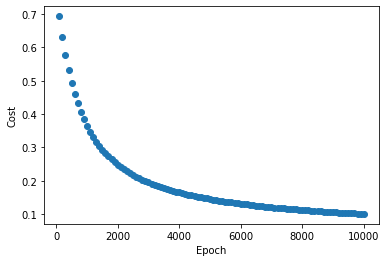

In [4]:
# Plot cost function
Epoch=pd.DataFrame(list(range(100,100001,100)))
Cost=pd.DataFrame(costs)
Cost_data=pd.concat([Epoch, Cost], axis=1)
Cost_data.columns=['Epoch','Cost']
plt.scatter(Cost_data['Epoch'], Cost_data['Cost'])
plt.xlabel('Epoch')
plt.ylabel('Cost')

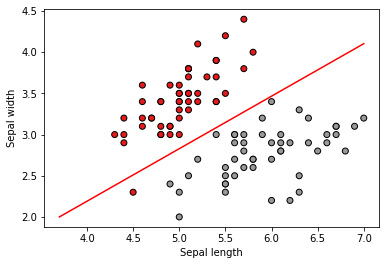

In [5]:
# Plot linear classification
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,edgecolor='k')
line=mlines.Line2D([3.701,7],[2,4.1034],color='red')
ax.add_line(line)
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
plt.show()

In [27]:
from sklearn.linear_model import LogisticRegression
#this is a classification algorithm not regression

In [31]:
model = LogisticRegression().fit(X,y)

In [33]:
model.intercept_

array([-7.27160604])

In [34]:
w1 = model.coef_[0][0]
w2 = model.coef_[0][1]
b = model.intercept_

In [35]:
minx = np.min(X[:, 0])
maxx = np.max(X[:, 0])

In [36]:
y1 = -(b + w1*minx) / w2
y2 = -(b + w1*maxx) / w2

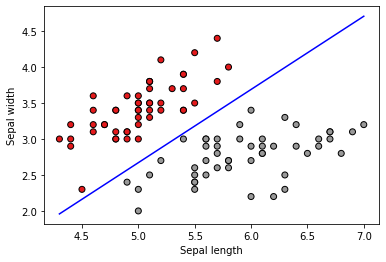

In [12]:
x = np.linspace(minx, maxx, 99)

# Plot linear classification
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,edgecolor='k')
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
plt.plot([minx, maxx], [y1, y2], c='blue')
plt.show()